### FRUIT CLASSIFICATION

In [1]:
#Path of dataset is https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers

### Dataset arranged in local folder
### dataset/
    │
    ├── apple/
    ├── banana/
    ├── mango/
    ├── orange/
    ├── watermelon/
    └── ... (one folder per class)


In [5]:
DATASET_DIR = "Dataset"  # path to your dataset
IMG_SIZE = (100, 100)
BATCH_SIZE = 64
SEED = 42


In [12]:
#Create ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#Training data generator

train_generator = datagen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

#Validation data generator
val_generator = datagen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED
)
#Check
print("Classes:", train_generator.class_indices)
print("Training samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)


Found 1610 images belonging to 10 classes.
Found 690 images belonging to 10 classes.
Classes: {'apples': 0, 'avocado': 1, 'banana': 2, 'cherry': 3, 'kiwi': 4, 'mango': 5, 'orange': 6, 'pineapple': 7, 'strawberries': 8, 'watermelon': 9}
Training samples: 1610
Validation samples: 690


In [15]:
#BUILDING THE MODEL

model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25)) #Dropout added
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25)) #Dropout added
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))                   
model.add(layers.Dense(10, activation='softmax'))

#Compile and fit model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history=model.fit(train_generator, validation_data=val_generator, epochs=30)


C:\Users\annua\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1304 - loss: 2.3113 - val_accuracy: 0.2377 - val_loss: 2.0596
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 912ms/step - accuracy: 0.2547 - loss: 1.9286 - val_accuracy: 0.2826 - val_loss: 1.7678
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2776 - loss: 1.7859 - val_accuracy: 0.3101 - val_loss: 1.7136
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 848ms/step - accuracy: 0.2975 - loss: 1.7770 - val_accuracy: 0.3362 - val_loss: 1.7066
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 928ms/step - accuracy: 0.3466 - loss: 1.6769 - val_accuracy: 0.4217 - val_loss: 1.5608
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3745 - loss: 1.6159 - val_accuracy: 0.4072 - val_loss: 1.5563
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3658 - loss: 1.6205 - val_accuracy: 0.3942 - val_loss: 1.5539
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 897ms/step - accuracy: 0.3950 - loss: 1.5765 - val_accuracy: 0.4101

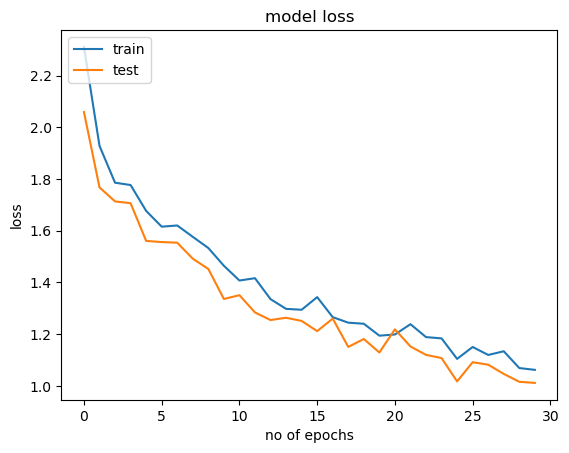

In [16]:
# 26/26 shows the number of batches, steps_per_epoch= ceil(1610(training)/64(batch_size)) = ceil(25.23) = 26 
#Plotting no of epochs Vs Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

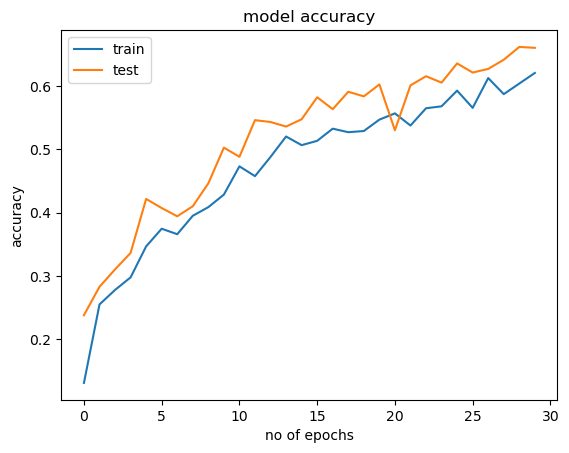

In [17]:
#Plotting no of epochs Vs Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#model.save('Models/fruits_classification_prac_acc123.h5')

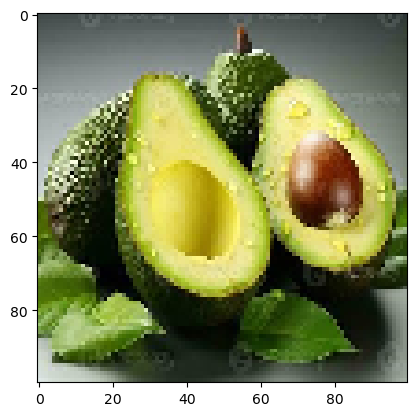

In [18]:
#Get image and try with model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image=load_img('PracticeImages(fruits)/avocado1.jpg', target_size=(100,100))
plt.imshow(image)
plt.show()

In [19]:
#Try model on images
img=img_to_array(image)
img=img.reshape((1,)+img.shape)
print(img.shape)

(1, 100, 100, 3)


In [20]:
res=model.predict(img)
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [21]:
class_labels={'apples': 0, 'avocado': 1, 'banana': 2, 'cherry': 3, 'kiwi': 4, 'mango':5, 'orange': 6, 'pineapple': 7, 'strawberries': 8, 'watermelon': 9}
print([key for key in class_labels][np.argmax(res)])

orange


In [22]:
#Calling avocado as orange
#Need to improve accuracy
#Trying hyperparameter tuning
import keras_tuner as kt

In [23]:
#We use the same model only with layer size options and maybe dropout options
def build_model(hp):
    model1=keras.Sequential()
    model1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
    model1.add(layers.MaxPooling2D(2,2))
    layers.Dropout(0.25)
    model1.add(layers.Conv2D(64,(3,3), activation='relu'))
    model1.add(layers.MaxPooling2D(2,2))
    layers.Dropout(0.25)
    model1.add(layers.Conv2D(128,(3,3), activation='relu'))
    model1.add(layers.MaxPooling2D(2,2))
    model1.add(layers.Dropout(0.25))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(units=hp.Choice('layer size', [64,128,256,512]), activation='relu'))
    model1.add(layers.Dropout(0.5))                   
    model1.add(layers.Dense(10, activation='softmax'))
    model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
    return model1

In [25]:
#Step2: Initialize a tuner(with RandomSearch or BayesianOptimization or HyperBand)
#'objective': To get best model == best accuracy
#'max_trials' to specify the different models to try

tuner=kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    overwrite=True,
    max_trials=4,
    directory='Models/param_tuning_demo_fruit',
    project_name='param_tuning_demo_fruit'
)

#run the search, this replaces the model.fit() method
tuner.search_space_summary()
tuner.search(train_generator,validation_data= val_generator,epochs=8)
best_model= tuner.get_best_models()[0] #to get the top-p best model

Trial 4 Complete [00h 02m 49s]
val_accuracy: 0.46521738171577454

Best val_accuracy So Far: 0.5492753386497498
Total elapsed time: 00h 12m 05s


C:\Users\annua\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
r=best_model.predict(img)
print(r)
class_labels={'apples': 0, 'avocado': 1, 'banana': 2, 'cherry': 3, 'kiwi': 4, 'mango':5, 'orange': 6, 'pineapple': 7, 'strawberries': 8, 'watermelon': 9}
print([key for key in class_labels][np.argmax(r)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00 8.581941e-19 0.000000e+00 0.000000e+00 0.000000e+00]]
mango
